In [ ]:
Sprint 11. Aprenentatge No Supervisat - Agrupació

In [ ]:
#Nivell 1

In [ ]:
#Exercici 1
#Classifica els diferents vols utilitzant l'algorisme de K-means.

In [1]:
#Llibreries import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
#Llibreries from
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
#Accedim a les dades del fitxer DelayedFlights
df_vols=pd.read_csv('Python/DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [6]:
# Netegem el dataset d'atributs innecesaris.
df_vols.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [7]:
# Suprimim valors no numerics.
df_vols=df_vols.dropna() 

In [8]:
# Utilitzarem només una petita part de les instàncies del dataframe.
df_vols=df_vols.head(10)

In [9]:
df_vols

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,6,1937.0,1830,2037.0,1940,509,240.0,250.0,230.0,57.0,67.0,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
7,11,1644.0,1510,1845.0,1725,1333,121.0,135.0,107.0,80.0,94.0,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
9,16,1452.0,1425,1640.0,1625,675,228.0,240.0,213.0,15.0,27.0,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
11,18,1323.0,1255,1526.0,1510,4,123.0,135.0,110.0,16.0,28.0,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0
12,19,1416.0,1325,1512.0,1435,54,56.0,70.0,49.0,37.0,51.0,220,2.0,5.0,12.0,0.0,0.0,0.0,25.0
13,21,1657.0,1625,1754.0,1735,623,57.0,70.0,47.0,19.0,32.0,220,5.0,5.0,7.0,0.0,0.0,0.0,12.0
17,26,1422.0,1255,1657.0,1610,188,155.0,195.0,143.0,47.0,87.0,1093,6.0,6.0,40.0,0.0,0.0,0.0,7.0
19,30,2107.0,1945,2334.0,2230,362,147.0,165.0,134.0,64.0,82.0,972,6.0,7.0,5.0,0.0,0.0,0.0,59.0
23,37,1812.0,1650,1927.0,1815,422,135.0,145.0,118.0,72.0,82.0,765,6.0,11.0,3.0,0.0,0.0,0.0,69.0


In [99]:
#features

array([[ 9.77075874e+00,  3.27621022e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-6.91330582e+00, -9.34755911e+00],
       [-1.08618591e+01, -1.07506350e+01],
       [-8.50038027e+00, -4.54370383e+00],
       [-4.82456978e+00, -5.20159136e+00],
       [-3.03819028e+00,  9.84354132e+00],
       [-8.17498253e+00, -6.24197227e+00],
       [ 3.91207254e+00,  9.45363489e+00],
       [-4.64425636e+00, -5.14863028e+00],
       [ 2.09082004e+00,  1.80947495e+00],
       [ 5.26539366e+00,  5.56781226e+00],
       [ 7.61826975e+00,  4.87112533e+00],
       [ 3.30512908e+00,  2.19832357e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-9.15936347e+00, -8.42060745e+00],
       [-2.70722546e+00,  1.17740016e+01],
       [-9.14073328e+00, -6.20996976e+00],
       [ 6.52709436e+00, -2.46179896e+00],
       [-2.51808095e+00, -1.02841022e+01],
       [ 1.04758084e+01,  4.81244915e+00],
       [ 3.33377923e+00,  1.76514294e-01],
       [-5.99215115e+00, -9.15499469e+00],
       [-2.

In [98]:
#true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

In [105]:
scaler = StandardScaler()
scaled_df_vols = scaler.fit_transform(df_vols)

In [106]:
scaled_df_vols

array([[-1.50613218,  0.68949749,  0.85513662,  0.57728312,  0.76486616,
         2.83419411, -0.76502995, -0.97524604, -0.78676507, -0.44913737,
        -0.95481654, -0.76660618, -1.125     ,  1.2579418 , -0.64061319,
         0.        ,  0.        ,  0.        , -0.13150595],
       [-1.3026008 ,  1.12986253,  1.17987205,  0.89914219,  0.83235435,
        -0.27330705,  1.77378626,  1.64726432,  1.84151126,  0.5736507 ,
         0.3365337 ,  1.67311062, -1.125     , -0.31448545,  0.09151617,
         0.        ,  0.        ,  0.        ,  0.50481316],
       [-0.79377236, -0.06483152, -0.20566577,  0.10687372, -0.13497638,
         0.47737631, -0.24034127, -0.237665  , -0.27141677,  1.59643877,
         1.39309299, -0.05691161,  0.75      ,  0.20965697, -0.09151617,
         0.        ,  0.        ,  0.        ,  1.56534502],
       [-0.28494393, -0.8477027 , -0.57369925, -0.73903794, -0.58489765,
        -0.12207715,  1.57068097,  1.48335743,  1.54948056, -1.29404925,
        -1.228

In [107]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [108]:
kmeans.fit(scaled_df_vols)

KMeans(init='random', n_clusters=3, random_state=42)

In [109]:
print("Valor SSE més baix:", kmeans.inertia_)

Valor SSE més baix: 83.95196805310437


In [110]:
kmeans.cluster_centers_

array([[-0.33582677, -0.42262812, -0.29226188, -0.54200242, -0.46679332,
         0.31088677, -0.90889621, -0.95475768, -0.8941293 , -0.78265522,
        -0.86676993, -0.91795478, -0.8125    , -0.18344985, -0.34318564,
         0.        ,  0.        ,  0.        , -0.58753465],
       [-0.28494393, -0.22928883, -0.23453114, -0.16959497, -0.13497638,
        -0.3203766 ,  1.22653032,  1.29213271,  1.24599767, -0.19714611,
         0.07565486,  1.21963166,  0.33333333, -0.31448545,  0.79314014,
         0.        ,  0.        ,  0.        , -0.55571869],
       [ 0.73271295,  0.79279299,  0.62421365,  0.89226486,  0.75736747,
        -0.0941391 , -0.01466872, -0.01912247, -0.05382527,  1.2406864 ,
         1.08003838,  0.00430805,  0.75      ,  0.55908525, -0.33555929,
         0.        ,  0.        ,  0.        ,  1.33909822]])

In [111]:
print("Iteracions: ", kmeans.n_iter_) #Nombre d'iteracions necessaries per la convergencia.

Iteracions:  2


In [112]:
kmeans.labels_

array([0, 1, 2, 1, 0, 0, 0, 1, 2, 2])

In [113]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42, }

In [114]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df_vols)
    sse.append(kmeans.inertia_)

C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [125]:
scaled_df_vols

array([[-1.50613218,  0.68949749,  0.85513662,  0.57728312,  0.76486616,
         2.83419411, -0.76502995, -0.97524604, -0.78676507, -0.44913737,
        -0.95481654, -0.76660618, -1.125     ,  1.2579418 , -0.64061319,
         0.        ,  0.        ,  0.        , -0.13150595],
       [-1.3026008 ,  1.12986253,  1.17987205,  0.89914219,  0.83235435,
        -0.27330705,  1.77378626,  1.64726432,  1.84151126,  0.5736507 ,
         0.3365337 ,  1.67311062, -1.125     , -0.31448545,  0.09151617,
         0.        ,  0.        ,  0.        ,  0.50481316],
       [-0.79377236, -0.06483152, -0.20566577,  0.10687372, -0.13497638,
         0.47737631, -0.24034127, -0.237665  , -0.27141677,  1.59643877,
         1.39309299, -0.05691161,  0.75      ,  0.20965697, -0.09151617,
         0.        ,  0.        ,  0.        ,  1.56534502],
       [-0.28494393, -0.8477027 , -0.57369925, -0.73903794, -0.58489765,
        -0.12207715,  1.57068097,  1.48335743,  1.54948056, -1.29404925,
        -1.228

In [129]:
x=scaled_df_vols[0]
y=scaled_df_vols[1]
kl = KneeLocator(x,y, S=1.0, curve="concave", direction="increasing")

In [134]:
print("Valor knee:", round(kl.knee, 3))

Valor knee: 0.689


In [135]:
print("Valor elbow:", round(kl.elbow, 3))

Valor elbow: 0.689


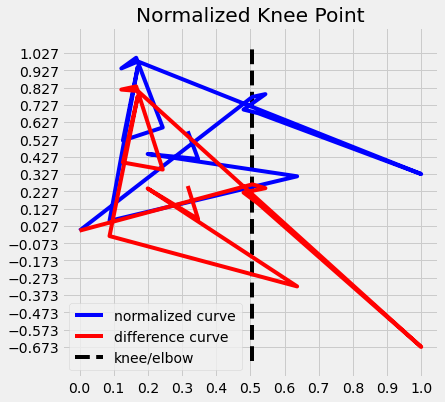

In [132]:
kl.plot_knee_normalized()

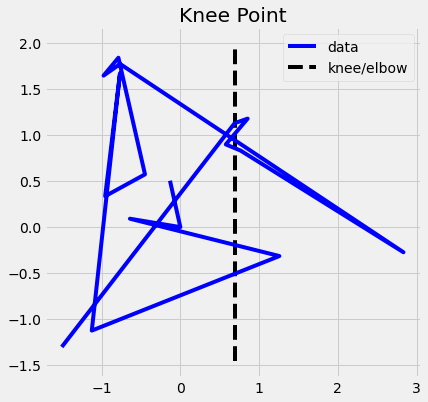

In [133]:
kl.plot_knee()

In [ ]:
#Nivell 2

In [ ]:
#Exercici 2
#Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [ ]:
#Aglomerative Hierachical clustering

In [31]:
df_vols #dataframe de 10 instàncies de les dades dels vols.

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,6,1937.0,1830,2037.0,1940,509,240.0,250.0,230.0,57.0,67.0,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
7,11,1644.0,1510,1845.0,1725,1333,121.0,135.0,107.0,80.0,94.0,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
9,16,1452.0,1425,1640.0,1625,675,228.0,240.0,213.0,15.0,27.0,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
11,18,1323.0,1255,1526.0,1510,4,123.0,135.0,110.0,16.0,28.0,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0
12,19,1416.0,1325,1512.0,1435,54,56.0,70.0,49.0,37.0,51.0,220,2.0,5.0,12.0,0.0,0.0,0.0,25.0
13,21,1657.0,1625,1754.0,1735,623,57.0,70.0,47.0,19.0,32.0,220,5.0,5.0,7.0,0.0,0.0,0.0,12.0
17,26,1422.0,1255,1657.0,1610,188,155.0,195.0,143.0,47.0,87.0,1093,6.0,6.0,40.0,0.0,0.0,0.0,7.0
19,30,2107.0,1945,2334.0,2230,362,147.0,165.0,134.0,64.0,82.0,972,6.0,7.0,5.0,0.0,0.0,0.0,59.0
23,37,1812.0,1650,1927.0,1815,422,135.0,145.0,118.0,72.0,82.0,765,6.0,11.0,3.0,0.0,0.0,0.0,69.0


In [38]:
#Llibreries import
import scipy.cluster.hierarchy as shc #Hierachical clustering

In [ ]:
#Llibreries from
from sklearn.preprocessing import normalize 
from sklearn.cluster import AgglomerativeClustering #Aglomerative Hierachical clustering

In [34]:
#Normalització dels vols
df_vols_scaled = normalize(df_vols)
df_vols_scaled = pd.DataFrame(df_vols_scaled, columns=df_vols.columns)
df_vols_scaled.head()

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.000735,0.336031,0.322435,0.359915,0.353668,0.720197,0.016535,0.016535,0.014147,0.006247,0.006247,0.094618,0.000551,0.001837,0.000367,0.0,0.0,0.0,0.005879
1,0.001415,0.456716,0.431487,0.480294,0.457423,0.120015,0.056588,0.058946,0.054231,0.013440,0.015798,0.375134,0.000707,0.001650,0.002358,0.0,0.0,0.0,0.011082
2,0.002951,0.441114,0.405160,0.495046,0.462848,0.357667,0.032466,0.036223,0.028710,0.021465,0.025222,0.222167,0.001610,0.002147,0.002147,0.0,0.0,0.0,0.019319
3,0.004562,0.414041,0.406342,0.467650,0.463373,0.192478,0.065015,0.068437,0.060737,0.004277,0.007699,0.424592,0.001996,0.002281,0.000855,0.0,0.0,0.0,0.003422
4,0.006108,0.448963,0.425887,0.517852,0.512422,0.001357,0.041740,0.045813,0.037329,0.005430,0.009502,0.284377,0.001357,0.003054,0.000000,0.0,0.0,0.0,0.005430


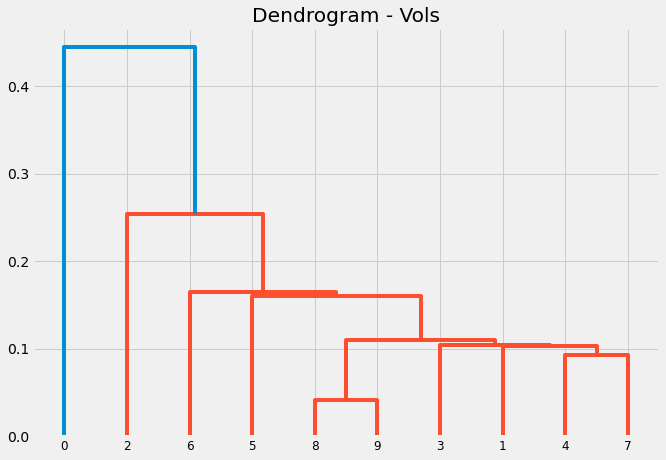

In [54]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram - Vols") #Generem un dendrograma dels vols 
vols = shc.dendrogram(shc.linkage(df_vols_scaled, method='single'))

In [51]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_vols_scaled)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
#Nivell 3

In [ ]:
#Exercici 3
#Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette. 
#El parametre silhouette té un interval [-1,1]

In [55]:
#Llibreries import
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
#Llibreries from
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [66]:
X= df_vols_scaled['ArrDelay']
Y= df_vols_scaled['Distance']
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) 

In [68]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

In [69]:
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.7766823273238923


In [ ]:
#El gran de separació dels clusters és més gran si el parametre silhouette s'apropa a 1.
#En el cas de l'exercici els clusters es troben més separats que junts.

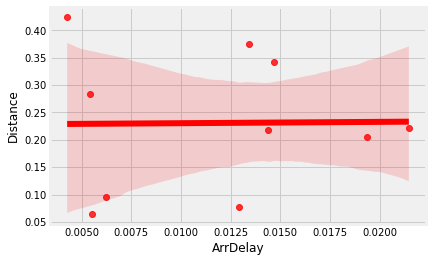

In [88]:
sns.regplot(x=X, y=Y, scatter=True, color="r")